<a href="https://colab.research.google.com/github/GMISSAGLIA/GM_PyLab/blob/Main/EU_Curve_PCA_With%20sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We apply Principal Component Analysis - PCA- to analyze IRS - Euribor EU interest rate curve using [numpy SCIKIT-LEARN](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

then we will go through the following steps:

1.   Loading the input data
2.   Transforming the loaded data 
3.   calculating the correlation matrix
4.   calculating Eigenvalues and Eigenvectors of the correlation matrix 
5.   Forming principal components projecting trasformed data into the    eigenvectors 
6.   Graph and Visualizing 





In [1]:
# importing required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import seaborn as sb

from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation

np.set_printoptions(precision=2)

In [2]:
#we Load the data in a pandas DataFrame from an excel file on github
path = r'https://github.com/GMISSAGLIA/GM_PyLab/blob/Main/T_EUR_CURVE.xlsx?raw=true'
df = pd.read_excel(path,index_col=[0], parse_dates=[0])

In [7]:
#we inspect the Data Frame by visualizing the first 5 rows
#the loaded input data contains daily observation of the EU interest rate curve 
#with 26 tenors from 1 week to 50 year 
pd.options.display.max_columns = None #to show all the columns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head(5)

,1W,1M,3M,6M,12M,1Y,18M,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,11Y,12Y,15Y,20Y,25Y,30Y,35Y,40Y,45Y,50Y
DT,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,-0.499,-0.438,-0.383,-0.324,-0.249,-0.321,-0.309,-0.291,-0.238,-0.175,-0.111,-0.046,0.018,0.083,0.147,0.211,0.271,0.327,0.470,0.604,0.639,0.621,0.613,0.575,0.550,0.529
2020-01-01,-0.499,-0.438,-0.383,-0.324,-0.249,-0.321,-0.309,-0.291,-0.238,-0.175,-0.111,-0.046,0.018,0.083,0.147,0.211,0.271,0.327,0.470,0.604,0.639,0.621,0.602,0.575,0.550,0.529
2020-01-02,-0.491,-0.436,-0.379,-0.323,-0.248,-0.322,-0.312,-0.299,-0.256,-0.203,-0.146,-0.085,-0.022,0.043,0.108,0.169,0.228,0.283,0.424,0.554,0.591,0.586,0.568,0.541,0.510,0.479
2020-01-03,-0.503,-0.443,-0.384,-0.323,-0.238,-0.328,-0.322,-0.314,-0.276,-0.233,-0.181,-0.126,-0.067,-0.005,0.059,0.117,0.175,0.229,0.367,0.497,0.535,0.526,0.507,0.480,0.450,0.425
2020-01-04,-0.503,-0.443,-0.384,-0.323,-0.238,-0.328,-0.322,-0.314,-0.276,-0.233,-0.181,-0.126,-0.067,-0.005,0.059,0.117,0.175,0.229,0.367,0.497,0.535,0.526,0.507,0.480,0.450,0.425


In [8]:
df.describe()

,1W,1M,3M,6M,12M,1Y,18M,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,11Y,12Y,15Y,20Y,25Y,30Y,35Y,40Y,45Y,50Y
count,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000,983.000
mean,-0.529,-0.501,-0.424,-0.331,-0.206,-0.241,-0.164,-0.108,-0.033,0.026,0.081,0.133,0.186,0.240,0.293,0.345,0.392,0.436,0.533,0.583,0.559,0.511,0.467,0.425,0.386,0.352
std,0.104,0.137,0.229,0.343,0.489,0.498,0.594,0.652,0.704,0.730,0.745,0.751,0.754,0.756,0.757,0.757,0.756,0.753,0.732,0.672,0.626,0.594,0.573,0.558,0.545,0.533
min,-0.602,-0.648,-0.605,-0.554,-0.518,-0.544,-0.547,-0.549,-0.543,-0.525,-0.500,-0.468,-0.431,-0.392,-0.351,-0.313,-0.282,-0.251,-0.183,-0.123,-0.171,-0.243,-0.277,-0.332,-0.378,-0.433
25%,-0.569,-0.558,-0.544,-0.520,-0.488,-0.509,-0.499,-0.486,-0.449,-0.405,-0.361,-0.324,-0.280,-0.234,-0.190,-0.147,-0.108,-0.070,0.023,0.095,0.087,0.053,0.020,-0.010,-0.042,-0.070
50%,-0.562,-0.547,-0.513,-0.486,-0.433,-0.463,-0.422,-0.384,-0.361,-0.321,-0.266,-0.208,-0.150,-0.088,-0.022,0.045,0.102,0.155,0.280,0.380,0.393,0.366,0.336,0.302,0.270,0.243
75%,-0.524,-0.502,-0.400,-0.313,-0.151,-0.263,-0.273,-0.253,-0.099,-0.013,0.050,0.113,0.166,0.223,0.280,0.336,0.389,0.433,0.529,0.583,0.580,0.552,0.523,0.498,0.471,0.446
max,0.005,0.394,0.822,1.363,1.921,1.954,2.148,2.236,2.271,2.312,2.377,2.433,2.474,2.524,2.579,2.620,2.636,2.653,2.662,2.562,2.432,2.320,2.225,2.134,2.062,1.994


In [9]:
def TransformData(dt_in, TransformType= 0):
 dt_out = np.empty_like(dt_in)
 if TransformType == 0:
   dt_out = dt_in.diff()
 elif TransformType == 1:  
  dt_out = dt_in.pct_change()
 else:
  dt_out =  dt_in
 return dt_out   

In [13]:
#we do first difference 
df_0  = TransformData(df)
df_1  = df_0[df_0.iloc[:,1].isna()==False]
data = df_1.values
#then we Standardize using sklearn StandardScaler
sc = StandardScaler() 
std_data = sc.fit_transform(data) #Numpy ndarray

In [14]:
#we will use dates (index of the DataFrame) and Columns Names in the next steps
Dates=list(df_1.index.values)
ColumnsNames = list(df_1.columns)
df_std_data = pd.DataFrame(std_data, columns = ColumnsNames) #pandas DataFrame


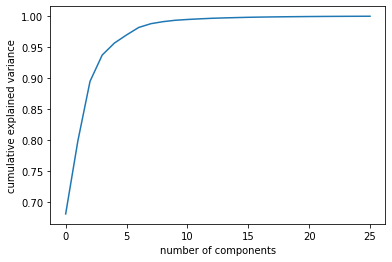

In [16]:
#Principal Component Analysis using sklearn
#we don't do any selection and take all the eigenvalues and related eigenvectors
pcamodel = PCA().fit(df_std_data)#df_std_data is a pandas DataFrame
eigen_values = pcamodel.explained_variance_
eigen_vectors = pcamodel.components_.T #eigenvectors are represented as row vector the we transpose
loadings = eigen_vectors * np.sqrt(eigen_values)

plt.plot(np.cumsum(pcamodel.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#we export eigenvectors, eigen_values and loadings in excel 
pd.DataFrame(eigen_vectors).to_excel('sklearn_EIGENVECTORS.xlsx')
pd.DataFrame(eigen_values).to_excel('sklearn_EIGENVALUES.xlsx')
pd.DataFrame(loadings).to_excel('sklearn_loadings.xlsx')

Text(0.5, 0, 'Principal Component')

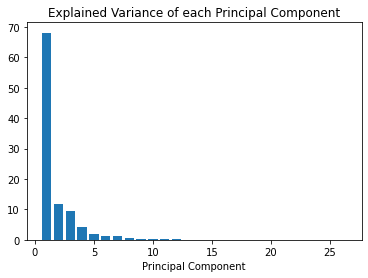

In [17]:
plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1, 1), pcamodel.explained_variance_ratio_ *100 )
plt.title("Principal Component explained variance")
plt.xlabel("Principal Component")

In [19]:
#then we parametrize to consider only the first five components 
pcamodel = PCA(n_components=5)
PC = pcamodel.fit_transform(df_std_data)#projection of the original variable onto eigenvectors space
PC.shape
#we have reduced the dimensions passing from the 26 original variables(tenors rates) to 5 principal components 


(982, 5)

In [28]:
#we get eigenvalues, eigenvectors and loadings
selected_eigen_values = pcamodel.explained_variance_
selected_eigen_values_ratio = pcamodel.explained_variance_ratio_ * 100
selected_eigen_vectors= pcamodel.components_.T
selected_loadings = selected_eigen_vectors * np.sqrt(selected_eigen_values)
#loadings are the eigenvectors scaled by the square root of the corresponding eigenvalues

In [22]:
pd.DataFrame(selected_eigen_vectors)

,0,1,2,3,4
0,-0.032,0.091,0.087,0.863,-0.468
1,-0.002,0.357,0.274,0.311,0.693
2,0.021,0.437,0.257,0.046,0.163
3,0.036,0.474,0.227,-0.183,-0.269
4,0.047,0.423,0.209,-0.327,-0.315
5,0.179,0.276,-0.205,-0.042,-0.155
6,0.193,0.183,-0.275,0.010,-0.095
7,0.200,0.149,-0.280,0.024,-0.048
8,0.207,0.107,-0.265,0.042,0.000
9,0.217,0.079,-0.226,0.038,0.044


Text(0.5, 0, 'Principal Component')

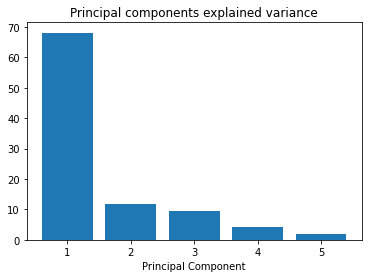

In [24]:
#Explained variance Bar plot
plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1, 1), pcamodel.explained_variance_ratio_ *100 )
plt.title("Principal components explained variance")
plt.xlabel("Principal Component")

In [38]:
#Because we work on standardized variables, the total variance is the
#number of the original variables = tenors of the interest rate curve
pd.DataFrame(selected_eigen_values,  index = [1,2,3,4,5] ,columns = ['Explained Variance'])

,Explained Variance
1,17.732
2,3.058
3,2.504
4,1.104
5,0.502


In [39]:
#Percentage of the total variance explained by each component
#then first component explains 68.13% , second 11.75%  and so on 
pd.DataFrame(selected_eigen_values_ratio, index = [1,2,3,4,5] ,columns = ['Explained Variance %'])

,Explained Variance %
1,68.132
2,11.748
3,9.621
4,4.240
5,1.929


In [42]:
#and it is equal to:
pd.DataFrame(selected_eigen_values/26*100,  index = [1,2,3,4,5] ,columns = ['Explained Variance %'])

,Explained Variance %
1,68.201
2,11.760
3,9.631
4,4.245
5,1.931
